In [64]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv("data_clean.csv")
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [66]:
type(data)

pandas.core.frame.DataFrame

In [67]:
data.shape

(158, 10)

In [68]:
data.describe()

,Unnamed: 0,Ozone,Solar.R,Wind,Day,Year,Temp
count,158.000000,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,79.500000,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,45.754781,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,40.250000,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,79.500000,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,118.750000,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,158.000000,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [69]:
data.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


### **Data Type Conversion**

In [71]:
data['Month'] = pd.to_numeric(data['Month'], errors='coerce')
data['Temp C'] = pd.to_numeric(data['Temp C'], errors='coerce')# coerce will introduce NA values for non numeric data in the columns
data['Weather'] = data['Weather'].astype('category')           #data['Wind']=data['Wind'].astype('int64')

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  158 non-null    int64   
 1   Ozone       120 non-null    float64 
 2   Solar.R     151 non-null    float64 
 3   Wind        158 non-null    float64 
 4   Temp C      157 non-null    float64 
 5   Month       157 non-null    float64 
 6   Day         158 non-null    int64   
 7   Year        158 non-null    int64   
 8   Temp        158 non-null    int64   
 9   Weather     155 non-null    category
dtypes: category(1), float64(5), int64(4)
memory usage: 11.5 KB


### **Duplicates**

In [73]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156    False
157    False
Length: 158, dtype: bool

In [74]:
#Print the duplicated rows
data[data.duplicated()]

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather


In [75]:
#Count of duplicated rows
data[data.duplicated()].shape

(0, 10)

In [76]:
data_cleaned1 = data.drop_duplicates()
data_cleaned1

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,2,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,3,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,4,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,5,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,155,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
155,156,NaN,145.0,13.2,77.0,9.0,27,2010,77,S
156,157,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [77]:
data_cleaned1.shape

(158, 10)

### **Drop Columns**

In [78]:
data_cleaned2 = data_cleaned1.drop('Temp C', axis = 1)
data_cleaned2

,Unnamed: 0,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,5.0,1,2010,67,S
1,2,36.0,118.0,8.0,5.0,2,2010,72,C
2,3,12.0,149.0,12.6,5.0,3,2010,74,PS
3,4,18.0,313.0,11.5,5.0,4,2010,62,S
4,5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,5.0,1,2010,67,C
154,155,30.0,193.0,6.9,9.0,26,2010,70,PS
155,156,NaN,145.0,13.2,9.0,27,2010,77,S
156,157,14.0,191.0,14.3,9.0,28,2010,75,S


In [79]:
#std dev of Year is 0. All Years are 2010
#Year has no effect on target variable.

#Unnamed: 0 is of no use

data_cleaned3 = data_cleaned2.drop(['Year', 'Unnamed: 0'], axis=1)
data_cleaned3

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5.0,1,67,S
1,36.0,118.0,8.0,5.0,2,72,C
2,12.0,149.0,12.6,5.0,3,74,PS
3,18.0,313.0,11.5,5.0,4,62,S
4,NaN,NaN,14.3,5.0,5,56,S
...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5.0,1,67,C
154,30.0,193.0,6.9,9.0,26,70,PS
155,NaN,145.0,13.2,9.0,27,77,S
156,14.0,191.0,14.3,9.0,28,75,S


### **Rename Columns**

In [80]:
#rename the Solar column
data_cleaned4 = data_cleaned3.rename({'Solar.R': 'Solar'}, axis=1)
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5.0,1,67,S
1,36.0,118.0,8.0,5.0,2,72,C
2,12.0,149.0,12.6,5.0,3,74,PS
3,18.0,313.0,11.5,5.0,4,62,S
4,NaN,NaN,14.3,5.0,5,56,S
...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5.0,1,67,C
154,30.0,193.0,6.9,9.0,26,70,PS
155,NaN,145.0,13.2,9.0,27,77,S
156,14.0,191.0,14.3,9.0,28,75,S


### **Outlier Detection**

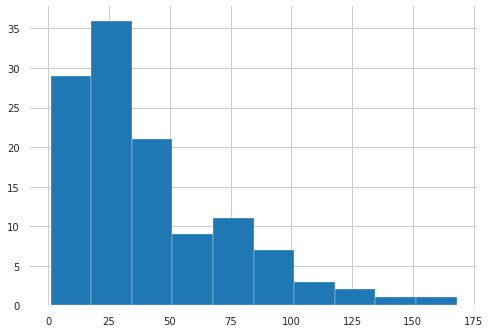

In [81]:
# histogram of Ozone
data_cleaned4['Ozone'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f829750a450>,
 'caps': [<matplotlib.lines.Line2D at 0x7f829750aed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8297583e10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f82975109d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8297510f10>],
 'means': []}

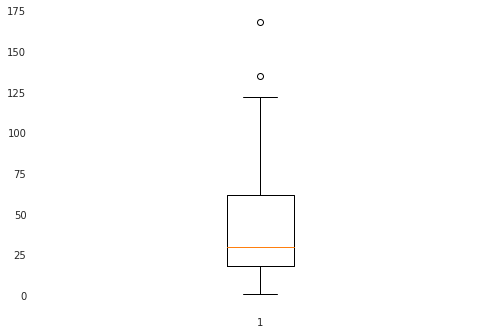

In [82]:
#Box plot
data_box = data_cleaned4.dropna()

data1_box = data_box['Ozone']

plt.boxplot(data1_box)

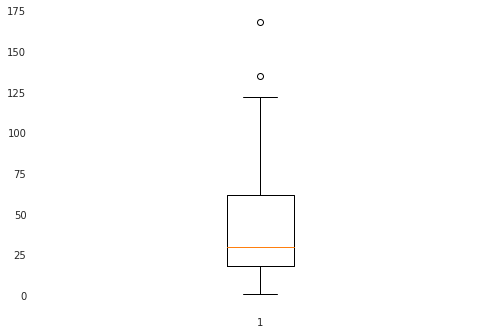

In [83]:
#Extracting outliers
box = plt.boxplot(data1_box)

In [84]:
type(box)

dict

In [85]:
for each in box['fliers']:
    print(each.get_ydata())

[135. 168.]


In [86]:
[item.get_ydata() for item in box['fliers']] #fliers are outliers

[array([135., 168.])]

In [87]:
#To get the caps
[item.get_ydata()[1] for item in box['whiskers']]

[1.0, 122.0]

In [88]:
#Descriptive stat
data_cleaned4['Ozone'].describe()

count    120.000000
mean      41.583333
std       32.620709
min        1.000000
25%       18.000000
50%       30.500000
75%       61.500000
max      168.000000
Name: Ozone, dtype: float64

In [89]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5.0,1,67,S
1,36.0,118.0,8.0,5.0,2,72,C
2,12.0,149.0,12.6,5.0,3,74,PS
3,18.0,313.0,11.5,5.0,4,62,S
4,NaN,NaN,14.3,5.0,5,56,S
...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5.0,1,67,C
154,30.0,193.0,6.9,9.0,26,70,PS
155,NaN,145.0,13.2,9.0,27,77,S
156,14.0,191.0,14.3,9.0,28,75,S


In [90]:
data['Weather'].value_counts()

S     59
C     49
PS    47
Name: Weather, dtype: int64

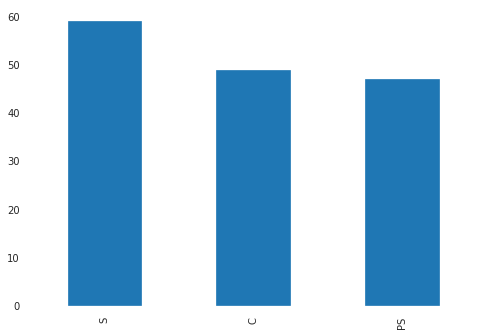

In [91]:
#Bar plot
data['Weather'].value_counts().plot.bar()

### **Missing Value Imputation**

In [92]:
cols = data_cleaned4.columns
cols

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Temp', 'Weather'], dtype='object')

In [93]:
data_cleaned4[cols].isnull()

,Ozone,Solar,Wind,Month,Day,Temp,Weather
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False
155,True,False,False,False,False,False,False
156,False,False,False,False,False,False,False


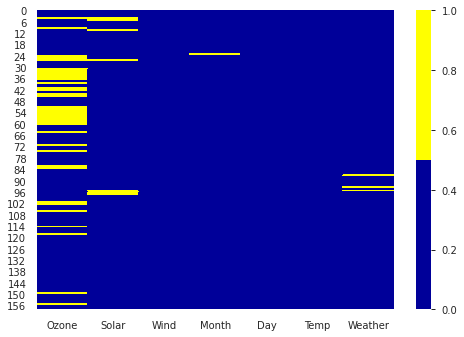

In [94]:
#Heatmap
import seaborn as sns

colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.

sns.heatmap(data_cleaned4[cols].isnull(),
            cmap = sns.color_palette(colours))

In [95]:
data_cleaned4.isnull()

,Ozone,Solar,Wind,Month,Day,Temp,Weather
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False
155,True,False,False,False,False,False,False
156,False,False,False,False,False,False,False


In [96]:
data_cleaned4.isnull().any(axis = 1)

0      False
1      False
2      False
3      False
4       True
       ...  
153    False
154    False
155     True
156    False
157    False
Length: 158, dtype: bool

In [97]:
data_cleaned4[data_cleaned4.isnull().any(axis=1)]

,Ozone,Solar,Wind,Month,Day,Temp,Weather
4,NaN,NaN,14.3,5.0,5,56,S
5,28.0,NaN,14.9,5.0,6,66,C
9,NaN,194.0,8.6,5.0,10,69,S
10,7.0,NaN,6.9,5.0,11,74,C
23,32.0,92.0,12.0,NaN,24,61,C
24,NaN,66.0,16.6,5.0,25,57,PS
25,NaN,266.0,14.9,5.0,26,58,C
26,NaN,NaN,8.0,5.0,27,57,PS
31,NaN,286.0,8.6,6.0,1,78,S
32,NaN,287.0,9.7,6.0,2,74,C


In [98]:
data_cleaned4[data_cleaned4.isnull().any(axis=1)].shape[0]

46

In [99]:
data_cleaned4.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Temp        0
Weather     3
dtype: int64

In [100]:
#Mean Value Imputation
mean = data_cleaned4['Ozone'].mean()
print(mean)

41.583333333333336


In [101]:
data_cleaned4['Ozone'] = data_cleaned4['Ozone'].fillna(mean)
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Temp,Weather
0,41.000000,190.0,7.4,5.0,1,67,S
1,36.000000,118.0,8.0,5.0,2,72,C
2,12.000000,149.0,12.6,5.0,3,74,PS
3,18.000000,313.0,11.5,5.0,4,62,S
4,41.583333,NaN,14.3,5.0,5,56,S
...,...,...,...,...,...,...,...
153,41.000000,190.0,7.4,5.0,1,67,C
154,30.000000,193.0,6.9,9.0,26,70,PS
155,41.583333,145.0,13.2,9.0,27,77,S
156,14.000000,191.0,14.3,9.0,28,75,S


In [102]:
#Missing value imputation for categorical vlaue
#Get the object columns
obj_columns = data_cleaned4[['Weather']]
obj_columns

,Weather
0,S
1,C
2,PS
3,S
4,S
...,...
153,C
154,PS
155,S
156,S


In [103]:
obj_columns.isnull()

,Weather
0,False
1,False
2,False
3,False
4,False
...,...
153,False
154,False
155,False
156,False


In [104]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [105]:
obj_columns.mode()

,Weather
0,S


In [106]:
mode = obj_columns.mode().iloc[0]
mode

Weather    S
Name: 0, dtype: category
Categories (3, object): ['C', 'PS', 'S']

In [107]:
#Missing value imputation for categorical vlaue
obj_columns = obj_columns.fillna(mode)
obj_columns

,Weather
0,S
1,C
2,PS
3,S
4,S
...,...
153,C
154,PS
155,S
156,S


In [108]:
obj_columns.isnull().sum()

Weather    0
dtype: int64

In [109]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Temp,Weather
0,41.000000,190.0,7.4,5.0,1,67,S
1,36.000000,118.0,8.0,5.0,2,72,C
2,12.000000,149.0,12.6,5.0,3,74,PS
3,18.000000,313.0,11.5,5.0,4,62,S
4,41.583333,NaN,14.3,5.0,5,56,S
...,...,...,...,...,...,...,...
153,41.000000,190.0,7.4,5.0,1,67,C
154,30.000000,193.0,6.9,9.0,26,70,PS
155,41.583333,145.0,13.2,9.0,27,77,S
156,14.000000,191.0,14.3,9.0,28,75,S


In [110]:
obj_columns.shape

(158, 1)

In [111]:
data_cleaned4.drop(['Weather'], axis=1, inplace=True)

In [112]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Temp
0,41.000000,190.0,7.4,5.0,1,67
1,36.000000,118.0,8.0,5.0,2,72
2,12.000000,149.0,12.6,5.0,3,74
3,18.000000,313.0,11.5,5.0,4,62
4,41.583333,NaN,14.3,5.0,5,56
...,...,...,...,...,...,...
153,41.000000,190.0,7.4,5.0,1,67
154,30.000000,193.0,6.9,9.0,26,70
155,41.583333,145.0,13.2,9.0,27,77
156,14.000000,191.0,14.3,9.0,28,75


In [113]:
#Join the data set with imputed object dataset
data_cleaned5 = pd.concat([data_cleaned4, obj_columns], axis=1)
data_cleaned5

,Ozone,Solar,Wind,Month,Day,Temp,Weather
0,41.000000,190.0,7.4,5.0,1,67,S
1,36.000000,118.0,8.0,5.0,2,72,C
2,12.000000,149.0,12.6,5.0,3,74,PS
3,18.000000,313.0,11.5,5.0,4,62,S
4,41.583333,NaN,14.3,5.0,5,56,S
...,...,...,...,...,...,...,...
153,41.000000,190.0,7.4,5.0,1,67,C
154,30.000000,193.0,6.9,9.0,26,70,PS
155,41.583333,145.0,13.2,9.0,27,77,S
156,14.000000,191.0,14.3,9.0,28,75,S


In [114]:
data_cleaned5.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Temp       0
Weather    0
dtype: int64

### **ScatterPlot and Correlation Analysis**

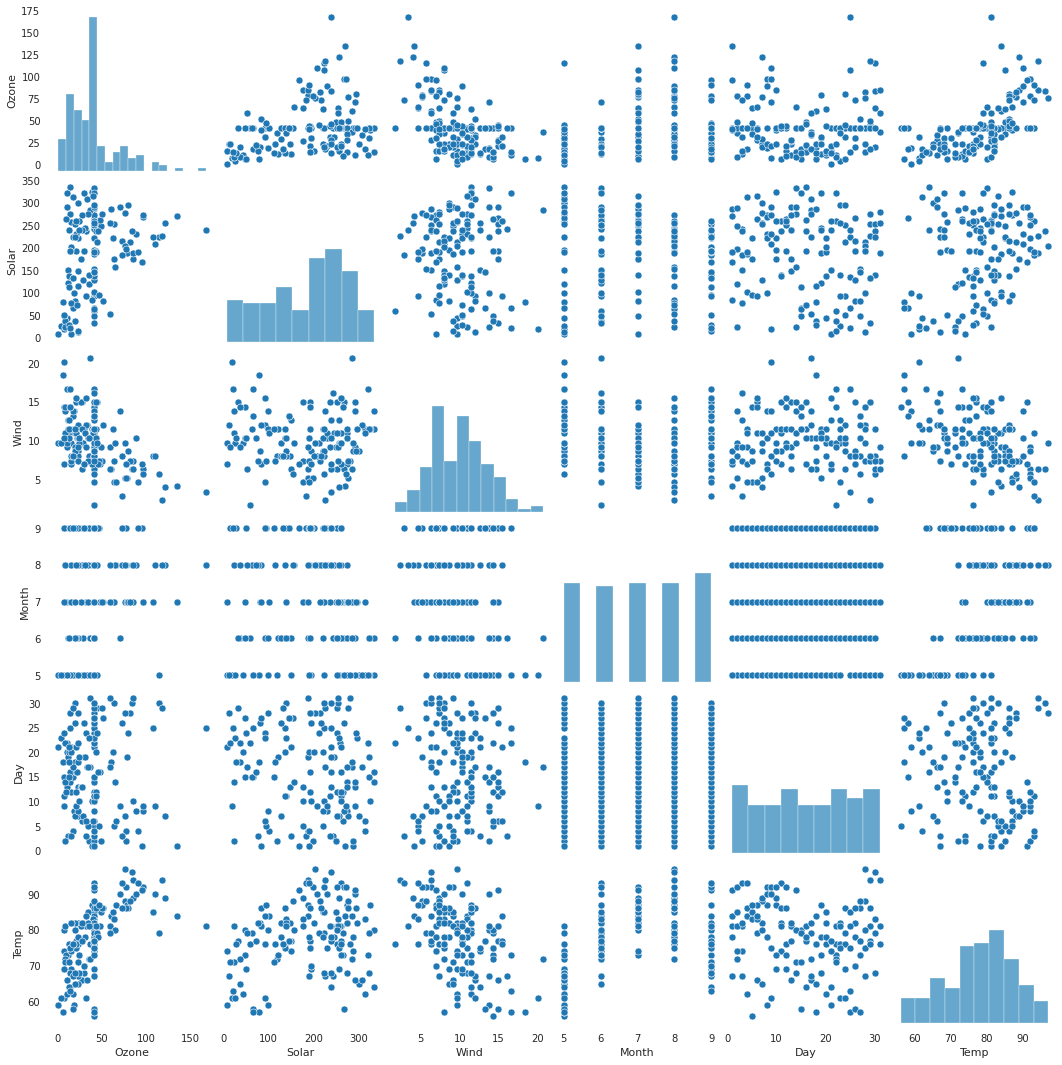

In [115]:
# Seaborn visualization library
import seaborn as sns

# Create the default pairplot
sns.pairplot(data_cleaned5)

In [116]:
#Correlation
data_cleaned5.corr()

,Ozone,Solar,Wind,Month,Day,Temp
Ozone,1.000000,0.307253,-0.523806,0.123962,-0.030241,0.606275
Solar,0.307253,1.000000,-0.056594,-0.092918,-0.154212,0.273322
Wind,-0.523806,-0.056594,1.000000,-0.153507,0.040151,-0.441247
Month,0.123962,-0.092918,-0.153507,1.000000,0.061236,0.393321
Day,-0.030241,-0.154212,0.040151,0.061236,1.000000,-0.124538
Temp,0.606275,0.273322,-0.441247,0.393321,-0.124538,1.000000


# **Transformations**

### **Dummy Variables**

In [117]:
data_cleaned5

,Ozone,Solar,Wind,Month,Day,Temp,Weather
0,41.000000,190.0,7.4,5.0,1,67,S
1,36.000000,118.0,8.0,5.0,2,72,C
2,12.000000,149.0,12.6,5.0,3,74,PS
3,18.000000,313.0,11.5,5.0,4,62,S
4,41.583333,NaN,14.3,5.0,5,56,S
...,...,...,...,...,...,...,...
153,41.000000,190.0,7.4,5.0,1,67,C
154,30.000000,193.0,6.9,9.0,26,70,PS
155,41.583333,145.0,13.2,9.0,27,77,S
156,14.000000,191.0,14.3,9.0,28,75,S


In [118]:
#Creating dummy variable for Weather column
data_cleaned6 = pd.get_dummies(data_cleaned5, columns=['Weather'])
data_cleaned6

,Ozone,Solar,Wind,Month,Day,Temp,Weather_C,Weather_PS,Weather_S
0,41.000000,190.0,7.4,5.0,1,67,0,0,1
1,36.000000,118.0,8.0,5.0,2,72,1,0,0
2,12.000000,149.0,12.6,5.0,3,74,0,1,0
3,18.000000,313.0,11.5,5.0,4,62,0,0,1
4,41.583333,NaN,14.3,5.0,5,56,0,0,1
...,...,...,...,...,...,...,...,...,...
153,41.000000,190.0,7.4,5.0,1,67,1,0,0
154,30.000000,193.0,6.9,9.0,26,70,0,1,0
155,41.583333,145.0,13.2,9.0,27,77,0,0,1
156,14.000000,191.0,14.3,9.0,28,75,0,0,1


In [119]:
data_cleaned6 = data_cleaned6.dropna()
data_cleaned6

,Ozone,Solar,Wind,Month,Day,Temp,Weather_C,Weather_PS,Weather_S
0,41.000000,190.0,7.4,5.0,1,67,0,0,1
1,36.000000,118.0,8.0,5.0,2,72,1,0,0
2,12.000000,149.0,12.6,5.0,3,74,0,1,0
3,18.000000,313.0,11.5,5.0,4,62,0,0,1
6,23.000000,299.0,8.6,5.0,7,65,0,1,0
...,...,...,...,...,...,...,...,...,...
153,41.000000,190.0,7.4,5.0,1,67,1,0,0
154,30.000000,193.0,6.9,9.0,26,70,0,1,0
155,41.583333,145.0,13.2,9.0,27,77,0,0,1
156,14.000000,191.0,14.3,9.0,28,75,0,0,1


### **Normalization of Data**

In [120]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [121]:
data_cleaned6.values

array([[ 41.  , 190.  ,   7.4 , ...,   0.  ,   0.  ,   1.  ],
       [ 36.  , 118.  ,   8.  , ...,   1.  ,   0.  ,   0.  ],
       [ 12.  , 149.  ,  12.6 , ...,   0.  ,   1.  ,   0.  ],
       ...,
       [ 41.58, 145.  ,  13.2 , ...,   0.  ,   0.  ,   1.  ],
       [ 14.  , 191.  ,  14.3 , ...,   0.  ,   0.  ,   1.  ],
       [ 18.  , 131.  ,   8.  , ...,   1.  ,   0.  ,   0.  ]])

In [122]:
array = data_cleaned6.values

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
rescaledX
#print(rescaledX[0:5,:])

array([[0.24, 0.56, 0.3 , ..., 0.  , 0.  , 1.  ],
       [0.21, 0.34, 0.33, ..., 1.  , 0.  , 0.  ],
       [0.07, 0.43, 0.57, ..., 0.  , 1.  , 0.  ],
       ...,
       [0.24, 0.42, 0.61, ..., 0.  , 0.  , 1.  ],
       [0.08, 0.56, 0.66, ..., 0.  , 0.  , 1.  ],
       [0.1 , 0.38, 0.33, ..., 1.  , 0.  , 0.  ]])

In [123]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [124]:
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
rescaledX
#print(rescaledX[0:5,:])

array([[-2.12e-02,  4.50e-02, -7.41e-01, ..., -6.55e-01, -6.65e-01,
         1.24e+00],
       [-1.96e-01, -7.70e-01, -5.69e-01, ...,  1.53e+00, -6.65e-01,
        -8.05e-01],
       [-1.03e+00, -4.19e-01,  7.48e-01, ..., -6.55e-01,  1.50e+00,
        -8.05e-01],
       ...,
       [-8.14e-04, -4.64e-01,  9.19e-01, ..., -6.55e-01, -6.65e-01,
         1.24e+00],
       [-9.63e-01,  5.63e-02,  1.23e+00, ..., -6.55e-01, -6.65e-01,
         1.24e+00],
       [-8.24e-01, -6.23e-01, -5.69e-01, ...,  1.53e+00, -6.65e-01,
        -8.05e-01]])